# K-Means

## 1.K-means algorithm

In [117]:
import numpy as np

In [118]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat

In [119]:
dataMat = np.mat(loadDataSet('testSet.txt'))

In [120]:
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

In [121]:
distEclud(dataMat[0], dataMat[1])

5.184632816681332

In [122]:
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        minVal = min(dataSet[:, j])
        maxVal = max(dataSet[:, j])
        rangeJ = float(maxVal - minVal)
        centroids[:, j] = minVal + rangeJ * np.random.rand(k, 1)
    return centroids

In [123]:
randCent(dataMat, 2)

matrix([[-0.11560947, -3.11289557],
        [ 1.12189465,  1.83786365]])

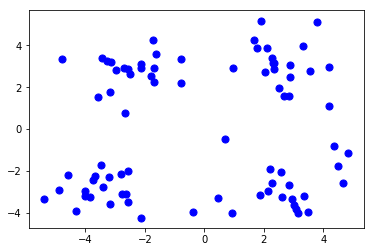

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], s = 50, c = 'b')
plt.show()

### k-means clustering algorithm

In [125]:
def kMeans(dataSet, k, distMeas = distEclud, createCent = randCent):
    """
    distMeas: calculate means
    createCent: create centroids
    """
    m, n = np.shape(dataSet)
    clusterAssment = np.mat(np.zeros((m, 2)))
    centroids = createCent(dataSet, k) # create centroids
    clusterChanges = True # record change or not
    while clusterChanges:
        clusterChanges = False
        for i in range(m): # cycle data
            minDist = np.inf
            minIndex = -1
            for j in range(k): # cycle centroids
                distJ = distMeas(dataSet[i,:], centroids[j, :])
                if distJ < minDist:
                    minDist = distJ
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanges = True # if type of current point change 
            clusterAssment[i, :] = minIndex, minDist ** 2
        #print(centroids) # print the current centroids every update
        for cent in range(k): # calculate current point center
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]] # 数组过滤来获得给定促的额所有点
            centroids[cent, :] = np.mean(ptsInClust, axis = 0)
    return centroids, clusterAssment

In [126]:
myCentroids, clustAssing = kMeans(dataMat, 4)

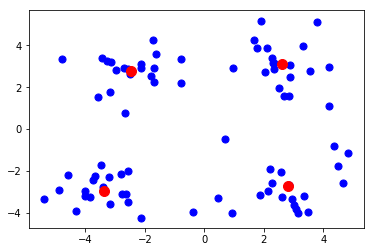

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], s = 50, c = 'b')
ax.scatter(myCentroids[:, 0].flatten().A[0], myCentroids[:, 1].flatten().A[0], s = 100, c = 'r')
plt.show()

## Bisecting K-Means

In [128]:
def biKmens(dataSet, k, distMeas = distEclud):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m, 2)))
    centroid0 = np.mean(dataSet, axis = 0).tolist()[0]
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j, 1] = distEclud(dataSet[j, :], np.mat(centroid0)) ** 2
    while(len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == i)[0], :]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = np.sum(splitClustAss[:, 1])
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:, 0].A != i)[0], 1])
            print("seeSplit = %f, and notSplit = %f"% (sseSplit, sseNotSplit))
            if(sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i # best sub set to split
                bestNewCents = centroidMat # best centroid center(two point)
                bestClustAss = splitClustAss.copy() # save the subM * 2 (label, sse)
                lowestSSE = sseSplit + sseNotSplit
        # 数组过滤选出本次2-means聚类划分后类编号为1数据点，将这些数据点类编号变为
        # 当前类个数+1， 作为新的一个聚类
        bestClustAss[np.nonzero(bestClustAss[:, 0].A == 1)[0], 0] = len(centList) # 0 label data update the labels + 1
        bestClustAss[np.nonzero(bestClustAss[:, 0].A == 0)[0], 0] = bestCentToSplit # 1 label data not change label
        print("the bestCentToSplit is: %d" % bestCentToSplit)
        print("the len of bestClustAss is: %d" % len(bestClustAss)) # the count of cluster sub set
        centList[bestCentToSplit] = bestNewCents[0, :] # update the original subSet 
        centList.append(bestNewCents[1, :])
        clusterAssment[np.nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0], :] = bestClustAss
    return centList, clusterAssment

In [129]:
dataMat2 = np.mat(loadDataSet("testSet2.txt"))
centList, myNewAssments = biKmens(dataMat2, 3)

seeSplit = 570.722757, and notSplit = 0.000000
the bestCentToSplit is: 0
the len of bestClustAss is: 60
seeSplit = 68.686548, and notSplit = 38.062951
seeSplit = 22.971772, and notSplit = 532.659807
the bestCentToSplit is: 0
the len of bestClustAss is: 40


In [130]:
centList

[matrix([[2.93386365, 3.12782785]]),
 matrix([[-2.94737575,  3.3263781 ]]),
 matrix([[-0.45965615, -2.7782156 ]])]

In [131]:
x0 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 0)[0], 0]
y0 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 0)[0], 1]
x1 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 1)[0], 0]
y1 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 1)[0], 1]
x2 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 2)[0], 0]
y2 = dataMat2[np.nonzero(myNewAssments[:, 0].A == 2)[0], 1]

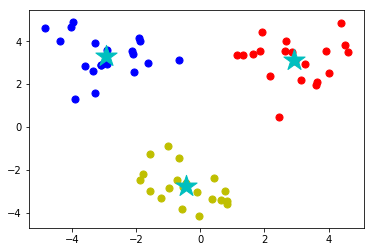

In [132]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x0.flatten().A[0], y0.flatten().A[0], s = 50, c = 'r')
ax.scatter(x1.flatten().A[0], y1.flatten().A[0], s = 50, c = 'b')
ax.scatter(x2.flatten().A[0], y2.flatten().A[0], s = 50, c = 'y')
for i in range(len(centList)):
    ax.scatter(centList[i][0, 0], centList[i][0, 1], marker = '*', s = 500, c = 'c')
plt.show()

# 2.clustering points on a map

In [133]:
def distSLC(vecA, vecB):
    """
    spherical law of consines to compute the distance between two sets of latitude and longitude
    """
    a = np.sin(vecA[0, 1] * np.pi / 180) * np.sin(vecB[0, 1] * np.pi / 180)
    b = np.cos(vecA[0, 1] * np.pi / 180) * np.cos(vecB[0, 1] * np.pi / 180) * np.cos(np.pi * (vecB[0, 0] - vecA[0, 0]) / 180)
    return np.arccos(a + b) * 6371.0

In [154]:
def clusterClubs(numClust = 5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.mat(datList)
    myCentroids, clustAssing = biKmens(datMat, numClust, distMeas = distSLC)
    print(myCentroids)
    
    fig = plt.figure()
    
    rect = [0.1, 0.1, 0.8, 0.8]
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    axprops = dict(xticks = [], yticks = [])
    ax0 = fig.add_axes(rect, label = 'axo', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1 = fig.add_axes(rect, label = 'ax1', frameon=False)
    for i in range(numClust):
        pltsInCurrCluster = datMat[np.nonzero(clustAssing[:, 0].A == i)[0], :]
        
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(pltsInCurrCluster[:, 0].flatten().A[0], pltsInCurrCluster[:, 1].flatten().A[0], marker = markerStyle, s = 90)

    for i in range(numClust):
        ax1.scatter(myCentroids[i].tolist()[0][0], myCentroids[i].tolist()[0][1], s = 300, c = 'k', marker = '+')


    plt.show()

seeSplit = 3063.694734, and notSplit = 0.000000
the bestCentToSplit is: 0
the len of bestClustAss is: 69
seeSplit = 791.084827, and notSplit = 1900.733171
seeSplit = 1255.904873, and notSplit = 1162.961562
the bestCentToSplit is: 1
the len of bestClustAss is: 35
seeSplit = 859.856203, and notSplit = 1255.904873
seeSplit = 76.734910, and notSplit = 2197.454417
seeSplit = 616.208381, and notSplit = 1384.373580
the bestCentToSplit is: 2
the len of bestClustAss is: 26
seeSplit = 855.306159, and notSplit = 837.620399
seeSplit = 76.734910, and notSplit = 1779.169943
seeSplit = 66.746174, and notSplit = 1552.309986
seeSplit = 24.098295, and notSplit = 1832.645556
the bestCentToSplit is: 2
the len of bestClustAss is: 20
[matrix([[-122.55776318,   45.51440209]]), matrix([[-122.69582389,   45.44488333]]), matrix([[-122.78288433,   45.4942305 ]]), matrix([[-122.72070683,   45.59796783]]), matrix([[-122.666982 ,   45.5215965]])]


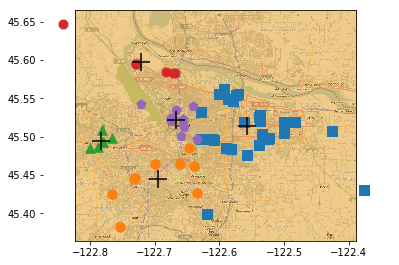

In [155]:
clusterClubs(5)